In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

##Load data

In [ ]:
df = pd.read_csv("/train.csv")

##EDA

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.size

10692

In [ ]:
df.shape

(891, 12)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

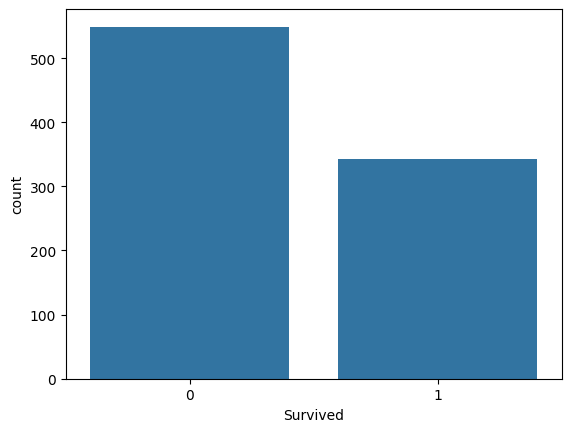

In [ ]:
sns.countplot(data= df, x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

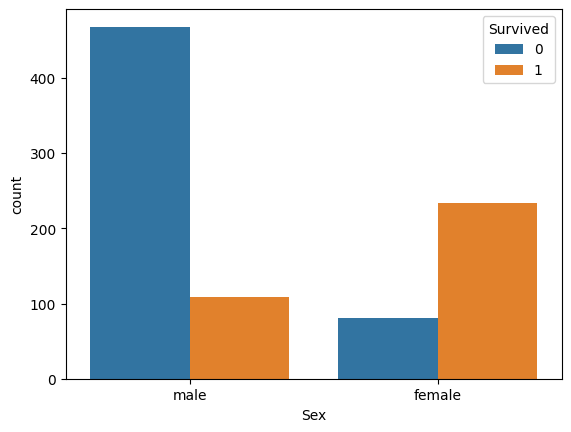

In [ ]:
sns.countplot(data= df, x='Sex', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

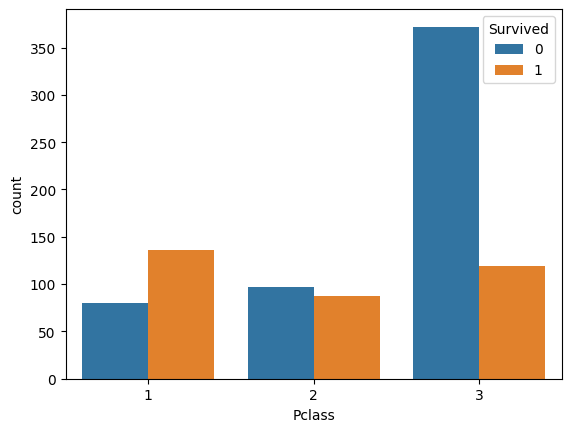

In [ ]:
sns.countplot(data= df, x='Pclass', hue='Survived')

<Axes: xlabel='Fare', ylabel='count'>

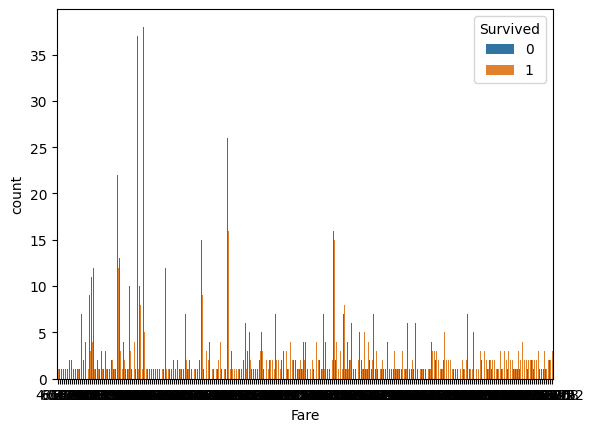

In [ ]:
sns.countplot(data= df, x='Fare', hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

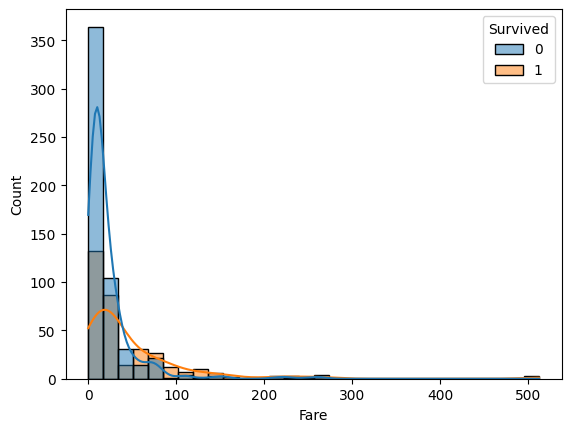

In [ ]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)

##Preprocessing columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
df['Fare_sc'] = sc.fit_transform(df[['Fare']])

In [ ]:
df['Fare_sc']

,Fare_sc
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337
...,...
886,-0.386671
887,-0.044381
888,-0.176263
889,-0.044381


In [ ]:
df['Fare']

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


<Axes: xlabel='Fare_sc', ylabel='count'>

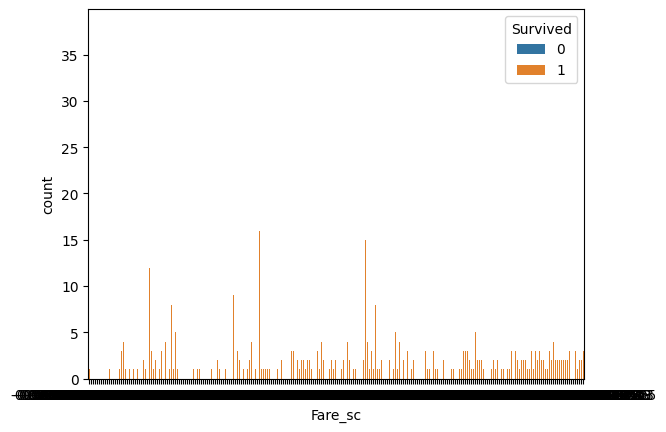

In [ ]:
sns.countplot(data = df, x = 'Fare_sc', hue= 'Survived')

<Axes: xlabel='Fare_sc', ylabel='Count'>

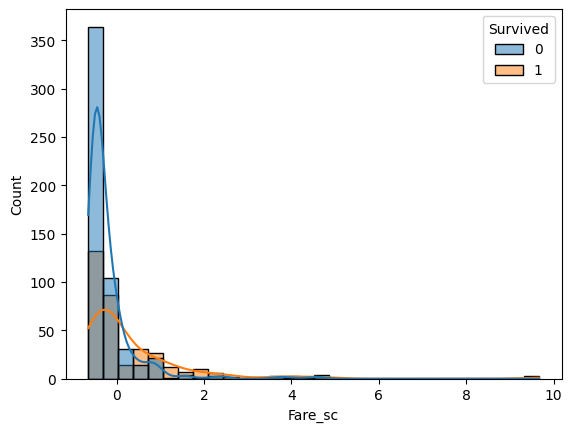

In [ ]:
sns.histplot(data=df, bins = 30, x='Fare_sc', hue='Survived', kde=True)

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-277-1933487976>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
le = LabelEncoder()

In [ ]:
df['Sex'] = le.fit_transform(df['Sex'])

##Training

In [ ]:
X = df[['Pclass', 'Age', 'Sex', 'Fare_sc']]

In [ ]:
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

##Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


In [ ]:
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[90 15]
 [20 54]]


In [ ]:
print("Classification Report \n", classification_report(y_test, y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

np.float64(0.7867553825874082)

####Scaling age

In [ ]:
df['age_sc'] = sc.fit_transform(df[['Age']])

In [ ]:
X = df[['Pclass', 'age_sc', 'Sex', 'Fare_sc']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


In [ ]:
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[90 15]
 [21 53]]


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

np.float64(0.7867553825874082)

##Adding more features

In [ ]:
df['family'] = df['SibSp'] + df['Parch'] +1

###one hot encoding
#####drops first column to ignore collinearity and create separate columns for all classes in embark

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
pd.get_dummies(df, columns=['Embarked'], drop_first=True) #drop embark_c

<ipython-input-300-1484262561>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fare_sc,age_sc,family,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,-0.502445,-0.565736,2,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.786845,0.663861,2,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.488854,-0.258337,1,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.420730,0.433312,2,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,-0.486337,0.433312,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,-0.386671,-0.181487,1,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,-0.044381,-0.796286,1,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,-0.176263,-0.104637,4,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,-0.044381,-0.258337,1,False,False


In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
#repacing with rare
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Lady',
                                'Sir', 'Capt', 'Countess', 'Jonkheer'], 'Rare')

#standardizing similar
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Rare,23


In [ ]:
df = pd.get_dummies(df, columns=['Embarked','Title'], drop_first=True)

## Rebuilding with added features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Fare_sc      891 non-null    float64
 12  age_sc       891 non-null    float64
 13  family       891 non-null    int64  
 14  Embarked_Q   891 non-null    bool   
 15  Embarked_S   891 non-null    bool   
 16  Title_Miss   891 non-null    bool   
 17  Title_Mr     891 non-null    bool   
 18  Title_Mrs    891 non-null    bool   
 19  Title_Ra

In [ ]:
X = df[['Pclass', 'age_sc', 'Sex', 'Fare_sc', 'family', 'Embarked_Q', 'Embarked_S',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']]

y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7932960893854749


In [ ]:
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[87 18]
 [19 55]]


In [ ]:
print("Classification Report \n", classification_report(y_test, y_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5).mean()

np.float64(0.8215491808423827)

##Using other models

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8324022346368715


In [ ]:
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[89 16]
 [14 60]]


In [ ]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
cross_val_score(rfc, X, y, cv=5).mean()

np.float64(0.8013432929508506)

###Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8212290502793296


In [ ]:
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[92 13]
 [19 55]]


In [ ]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
cross_val_score(gbc, X, y, cv=5).mean()

np.float64(0.8339024543343168)

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred),"\n")
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report\n", classification_report(y_test, y_pred),"\n")
print("Cross Val Score:", cross_val_score(dtc, X, y, cv=5).mean())

Accuracy:  0.7821229050279329 

Confusion_matrix: 
 [[86 19]
 [20 54]] 

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179
 

Cross Val Score: 0.7777728956123282


###K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred),"\n")
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report\n", classification_report(y_test, y_pred),"\n")
print("Cross Val Score:", cross_val_score(knn, X, y, cv=5).mean())

Accuracy:  0.7821229050279329 

Confusion_matrix: 
 [[86 19]
 [20 54]] 

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179
 

Cross Val Score: 0.8125855250768941


###SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred),"\n")
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred),"\n")
print("Classification Report\n", classification_report(y_test, y_pred),"\n")
print("Cross Val Score:", cross_val_score(svm, X, y, cv=5).mean())

Accuracy:  0.7821229050279329 

Confusion_matrix: 
 [[86 19]
 [20 54]] 

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179
 

Cross Val Score: 0.8327600276191074


##Testing

In [ ]:
test_df = pd.read_csv("/test.csv")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
#preprocessing as previous

#fill nan values of age and fare
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

#scaling age and fare
test_df['age_sc'] = sc.fit_transform(test_df[['Age']])
test_df['Fare_sc'] = sc.fit_transform(test_df[['Fare']])


#Encode sex
test_df['Sex'] = le.fit_transform(test_df['Sex'])

#add new features
test_df['family'] = test_df['SibSp'] + test_df['Parch'] + 1

test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
test_df['Title'] = test_df['Title'].replace(['Col', 'Rev', 'Dr', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

#one hot encoding
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Title'], drop_first=True)

In [ ]:
X_test_final = test_df[['Pclass', 'age_sc', 'Sex', 'Fare_sc', 'family', 'Embarked_Q', 'Embarked_S',
        'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']]

pred = rfc.predict(X_test_final)

In [ ]:
output = pd.DataFrame({
    'PassengerID': test_df['PassengerId'],
    'Survived': pred
})

In [ ]:
output

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1
